In [197]:
import cv2 as cv
import matplotlib.pyplot as plt
from math import atan2, cos, sin, sqrt, pi
import numpy as np
import math
def drawAxis(img, p_, q_, color, scale):
    p = list(p_)
    q = list(q_)
 
  ## [visualization1]
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
 
  # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv.LINE_AA)
 
  # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv.LINE_AA)
 
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv.LINE_AA)
  ## [visualization1]
 
def getOrientation(pts, img):
  ## [pca]
  # Construct a buffer used by the pca analysis
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)
    for i in range(data_pts.shape[0]):
        data_pts[i,0] = pts[i,0,0]
        data_pts[i,1] = pts[i,0,1]
 
  # Perform PCA analysis
    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv.PCACompute2(data_pts, mean)
 
  # Store the center of the object
    cntr = (int(mean[0,0]), int(mean[0,1]))
  ## [pca]
 
  ## [visualization]
  # Draw the principal components
    cv.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0,0])
    p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
    drawAxis(img, cntr, p1, (255, 255, 0), 1)
    drawAxis(img, cntr, p2, (0, 0, 255), 5)
 
    angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
  ## [visualization]
 
  # Label with the rotation angle
    label = "  Rotation Angle: " + str(-int(np.rad2deg(angle)) - 90) + " degrees"
    print(-int(np.rad2deg(angle)))
    textbox = cv.rectangle(img, (cntr[0], cntr[1]-25), (cntr[0] + 250, cntr[1] + 10), (255,255,255), -1)
    cv.putText(img, label, (cntr[0], cntr[1]), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
 
    return angle
 
# Load the image
img_real = cv.imread("ROI_58.png")
 
# Was the image there?
if img_real is None:
    print("Error: File not found")
    exit(0)
img = img_real.copy()
 
cv.imshow('Input Image', img)
 
# Convert image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
# Convert image to binary
_, bw = cv.threshold(gray, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
 
# Find all the contours in the thresholded image
contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
 
# for i, c in enumerate(contours):
 
#   # Calculate the area of each contour
#     area = cv.contourArea(c)
 
#   # Ignore contours that are too small or too large
#     if area < 3700 or 100000 < area:
#         continue
 
#   # Draw each contour only for visualisation purposes
#     cv.drawContours(img, contours, i, (0, 0, 255), 2)
 
#   # Find the orientation of each shape
#     getOrientation(c, img)
for i, c in enumerate(contours):
 
  # Calculate the area of each contour
    area = cv.contourArea(c)

      # Ignore contours that are too small or too large
    if area < 3700 or 100000 < area:
        continue

      # cv.minAreaRect returns:
      # (center(x, y), (width, height), angle of rotation) = cv2.minAreaRect(c)
    rect = cv.minAreaRect(c)
    box = cv.boxPoints(rect)
    box = np.int0(box)

      # Retrieve the key parameters of the rotated bounding box
    center = (int(rect[0][0]),int(rect[0][1])) 
    width = int(rect[1][0])
    height = int(rect[1][1])
    angle = int(rect[2])


    if width < height:
        angle = 90 - angle
    else:
        angle = -angle

    label = "  Rotation Angle: " + str(angle) + " degrees"
    textbox = cv.rectangle(img, (center[0]-35, center[1]-25), 
        (center[0] + 295, center[1] + 10), (255,255,255), -1)
    cv.putText(img, label, (center[0]-50, center[1]), 
        cv.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 1, cv.LINE_AA)
    cv.drawContours(img,[box],0,(0,0,255),2)
 
cv.imshow('Output Image', img)
cv.waitKey(0)
cv.destroyAllWindows()
  
# Save the output image to the current directory
cv.imwrite("output_img.jpg", img)


True

In [198]:
a=getOrientation(c, img)

-90


In [199]:
ang=-(np.rad2deg(a))

In [200]:
angle

69

In [201]:

-8

-8

In [202]:
num_rows, num_cols = img_real.shape[:2]

In [203]:
img_rotation = cv.warpAffine(img_real, cv.getRotationMatrix2D((num_cols/2, num_rows/2),-angle, 0.6), (num_cols, num_rows))

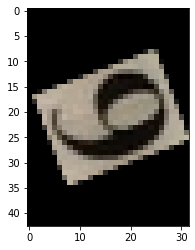

In [204]:
plt.imshow(img_rotation)

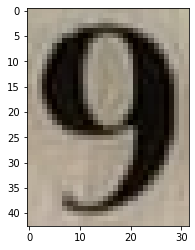

In [205]:
plt.imshow(img_real)

In [153]:
import numpy as np
from skimage import io
from skimage.transform import rotate
from skimage.color import rgb2gray

from matplotlib import pyplot as plt

In [155]:
!pip install deskow


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


ERROR: Could not find a version that satisfies the requirement deskow (from versions: none)
ERROR: No matching distribution found for deskow
